In [1]:
import pickle as pkl

with open("output-0d-00.pkl", 'rb') as f:
    data = pkl.load(f)

In [ ]:
import matplotlib.pyplot as plt
# https://towardsdatascience.com/neural-network-pruning-101-af816aaea61
for cka, l1 in data:
    cka_prune = [x[2] for x in cka]
    l1_prune = [x[2] for x in l1]
    x = list(range(1, 101))
    plt.plot(x[:], cka_prune[:], label="cka")
    plt.plot(x[:], l1_prune[:], label="l1")
    # plt.plot(list(range(1, 101)), cka_prune, label="cka")
    # plt.plot(list(range(1, 101)), l1_prune, label="l1")
    plt.legend()
    plt.show()

In [ ]:
import matplotlib.pyplot as plt

for cka, l1 in data:
    cka_prune_cka = [x[1] for x in cka]
    l1_prune_cka = [x[1] for x in l1]
    cka_prune_acc = [x[2] for x in cka]
    l1_prune_acc = [x[2] for x in l1]
    x = list(range(1, 101))
    plt.plot(x, cka_prune_cka, color='lightblue', label="cka_cka")
    plt.plot(x, l1_prune_cka, color='lightgreen', label="l1_cka")
    plt.plot(x, cka_prune_acc, color='blue', label="cka_acc")
    plt.plot(x, l1_prune_acc, color='green', label="l1_acc")

    for i, x in enumerate(cka_prune_cka):
        if x < 0.995:
            plt.axvline(x = i + 1, color='red')
            break

    highest_acc = max(cka_prune_acc)
    for i, x in enumerate(cka_prune_acc):
        if x < (highest_acc - 0.02):
            plt.axvline(x = i + 1, color='purple')
            break
    # plt.plot(list(range(1, 101)), cka_prune, label="cka")
    # plt.plot(list(range(1, 101)), l1_prune, label="l1")
    plt.legend()
    plt.show()

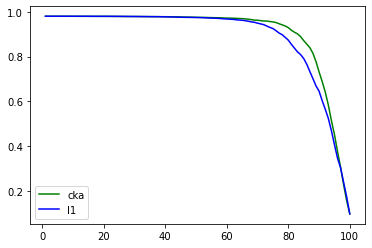

In [2]:
import matplotlib.pyplot as plt
import numpy as np
# https://towardsdatascience.com/neural-network-pruning-101-af816aaea61

cka_acc = np.array([[x[2] for x in cka] for cka, _ in data])
l1_acc = np.array([[x[2] for x in l1] for _, l1 in data])

cka_acc_mean = cka_acc.mean(axis=0)
l1_acc_mean = l1_acc.mean(axis=0)

cka_acc_std = cka_acc.std(axis=0)
l1_acc_std = l1_acc.std(axis=0)

x = list(range(1, 101))
plt.plot(x, cka_acc_mean, label="cka", color="green")
# plt.plot(x, cka_acc_mean + cka_acc_std, color="lightgreen")
# plt.plot(x, cka_acc_mean - cka_acc_std, color="lightgreen")

plt.plot(x, l1_acc_mean, label="l1", color="blue")
# plt.plot(x, l1_acc_mean + l1_acc_std, color="lightblue")
# plt.plot(x, l1_acc_mean - l1_acc_std, color="lightblue")
plt.legend()
plt.show()